In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [20]:
dataset = pd.read_csv('../placement2.csv')
dataset.head(3)

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1


In [21]:
dataset.isnull().sum()

cgpa            0
resume_score    0
placed          0
dtype: int64

In [22]:
x = dataset.iloc[:, :-1]
y = dataset['placed']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=1)

In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
lr.score(x_test, y_test) * 100

95.0

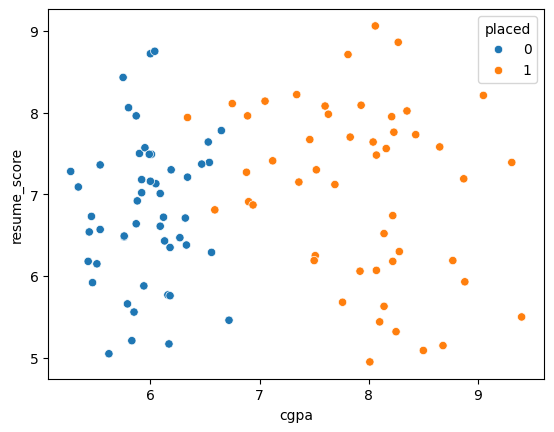

In [26]:
sns.scatterplot(x='cgpa', y='resume_score', data=dataset, hue='placed')
plt.show()

c:\Users\Prati\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


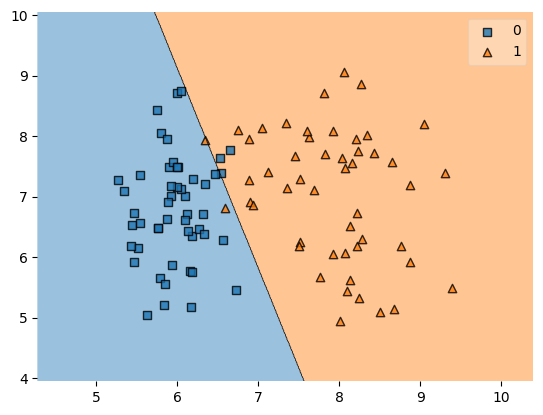

In [27]:
plot_decision_regions(X=x.to_numpy(), y=y.to_numpy(), clf=lr)
plt.show()

In [32]:
cf = confusion_matrix(y_test, lr.predict(x_test))
cf

array([[39,  3],
       [ 1, 37]])

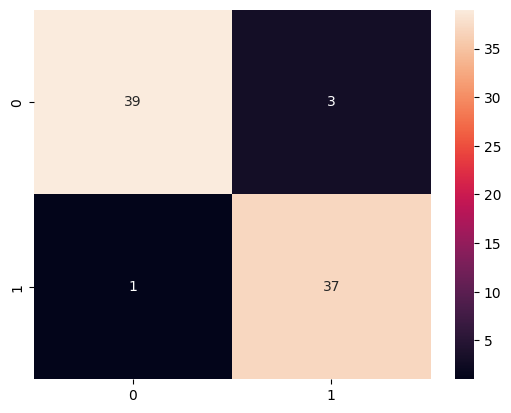

In [33]:
sns.heatmap(cf, annot=True)
plt.show()

In [35]:
precision_score(y_test, lr.predict(x_test)) * 100

92.5

In [36]:
recall_score(y_test, lr.predict(x_test)) * 100

97.36842105263158

In [37]:
f1_score(y_test, lr.predict(x_test)) * 100

94.87179487179486